## Modeling Notebook


In this notebook, we're going to apply various machine learning approaches analyze the mouse retinal data

In [1]:
import sklearn as sk
import anndata as ad
import scanpy as sc 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
adata = ad.read_h5ad('camr_scrublet_batch_filtered.h5ad')

In [4]:
print(adata)

adata.obs.head()

AnnData object with n_obs × n_vars = 312186 × 23304
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'pANN', 'sampleid', 'subclass_label', 'majorclass', 'author_cell_type', 'age', 'gender', 'reference', 'accession', 'sample_note', 'development_stage_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'tissue_type', 'library_platform', 'cell_type_ontology_term_id', 'is_primary_data', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 

,nCount_RNA,nFeature_RNA,percent.mt,pANN,sampleid,subclass_label,majorclass,author_cell_type,age,gender,...,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt,leiden_res_0.02,leiden_res_0.50,leiden_res_1.00,leiden_res_2.00
10x3_Ms_WT_P14_AAACCCAAGGGATCTG-1,8090.0,3062.0,9.431397,0.191304,10x3_Ms_WT_P14,NaN,BC,RBC,P14,Male,...,11.206648,18.703447,35.566470,34.262024,3.562807,1.558954,0,0,0,0
10x3_Ms_WT_P14_AAACCCACATGGATCT-1,8397.0,3145.0,7.264499,0.217391,10x3_Ms_WT_P14,NaN,BC,RBC,P14,Male,...,11.038934,18.514623,35.060276,33.661476,3.545629,1.517023,0,0,0,0
10x3_Ms_WT_P14_AAAGTCCAGCTGAAGC-1,11927.0,3686.0,8.325648,0.200000,10x3_Ms_WT_P14,NaN,BC,RBC,P14,Male,...,11.331282,18.874265,35.074913,35.927227,3.608949,1.616481,0,0,0,0
10x3_Ms_WT_P14_AAATGGAGTCACCCTT-1,10331.0,3621.0,6.427258,0.173913,10x3_Ms_WT_P14,NaN,BC,RBC,P14,Male,...,10.783757,17.909796,33.453434,31.818954,3.491006,1.395487,0,0,0,0
10x3_Ms_WT_P14_AACACACCAGAACTAA-1,11236.0,3739.0,6.034176,0.165217,10x3_Ms_WT_P14,NaN,BC,RBC,P14,Male,...,10.658214,17.735495,33.362328,31.138792,3.470064,1.345138,0,0,0,0


In [5]:
# Only keeping variable genes
adata = adata[:, adata.var.highly_variable]

In [6]:
print(adata)

View of AnnData object with n_obs × n_vars = 312186 × 1882
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'pANN', 'sampleid', 'subclass_label', 'majorclass', 'author_cell_type', 'age', 'gender', 'reference', 'accession', 'sample_note', 'development_stage_ontology_term_id', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'tissue_type', 'library_platform', 'cell_type_ontology_term_id', 'is_primary_data', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes', 'doublet_score', 'predicted_doublet', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_count

In [7]:
# Calculating Cluster Specific Differentially Expressed Genes
sc.tl.rank_genes_groups(adata, groupby="leiden_res_0.02", method="wilcoxon")


/project/hipaa_ycheng11lab/atlas/CAMR2024/py311env/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:645: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


KeyboardInterrupt: 

In [2]:
sc.pl.rank_genes_groups_dotplot(
    adata, groupby="leiden_res_0.02", standard_scale="var", n_genes=5,
)

plt.savefig('figures/modeling/rank_gene_groups_leiden_res_0.02.png')

NameError: name 'adata' is not defined

## Normalization Sanity Check

In [ ]:
# Normalization Sanity Check
print("Raw Counts:")
print(adata.layers["raw"][:5, :5])



Raw Counts:
  (2, 2)	0.5734496116638184
  (3, 2)	0.6386954188346863
  (4, 2)	0.34429892897605896
  (4, 4)	0.34429892897605896


In [ ]:
# Print the first few rows and columns of the normalized data
print("Normalized Data:")
print(adata.X[:5, :5])

Normalized Data:
  (2, 2)	0.41708502173423767
  (3, 2)	0.4458776116371155
  (4, 2)	0.26107800006866455
  (4, 4)	0.26107800006866455


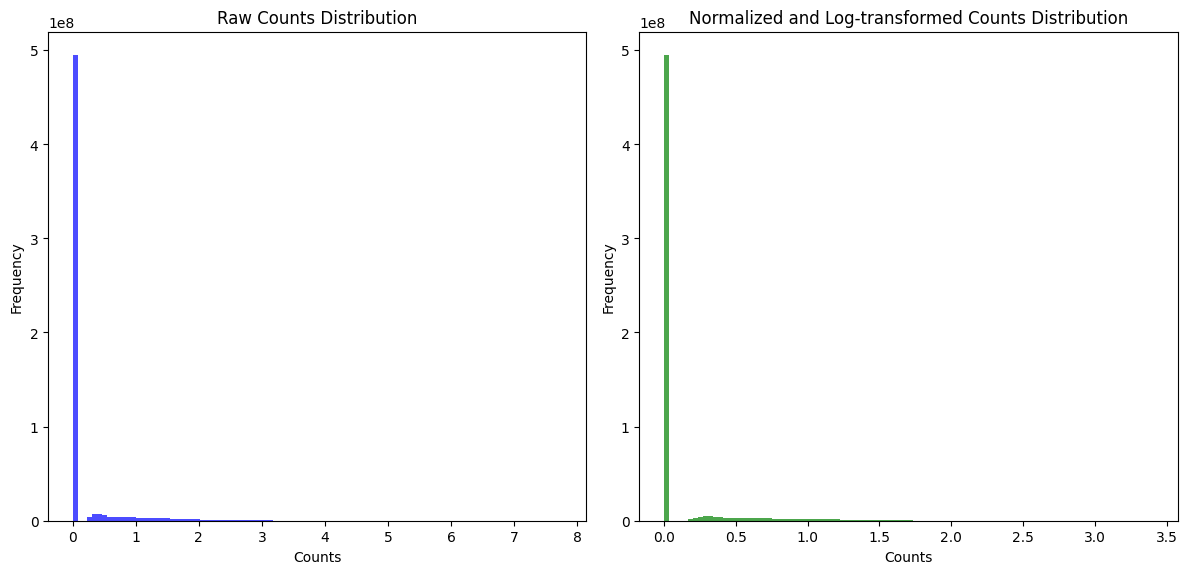

In [ ]:
import matplotlib.pyplot as plt

# Convert to dense arrays and flatten
raw_counts = adata.layers["raw"].toarray().flatten()
normalized_counts = adata.X.toarray().flatten()

# Plot histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(raw_counts, bins=100, color='blue', alpha=0.7)
plt.title('Raw Counts Distribution')
plt.xlabel('Counts')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(normalized_counts, bins=100, color='green', alpha=0.7)
plt.title('Normalized and Log-transformed Counts Distribution')
plt.xlabel('Counts')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
# Summary statistics for raw counts
print("Raw Counts Summary Statistics:")
print(f"Min: {np.min(raw_counts)}, Max: {np.max(raw_counts)}, Mean: {np.mean(raw_counts)}, Std: {np.std(raw_counts)}")

# Summary statistics for normalized and log-transformed counts
print("Normalized and Log-transformed Counts Summary Statistics:")
print(f"Min: {np.min(normalized_counts)}, Max: {np.max(normalized_counts)}, Mean: {np.mean(normalized_counts)}, Std: {np.std(normalized_counts)}")


Raw Counts Summary Statistics:
Min: 0.0, Max: 7.755390644073486, Mean: 0.18239399790763855, Std: 0.5289703011512756
Normalized and Log-transformed Counts Summary Statistics:
Min: 0.0, Max: 3.404916524887085, Mean: 0.11371065676212311, Std: 0.30618733167648315


## Cell Classification Analysis

### Random Forrest Classifier

In [8]:
from scipy.sparse import issparse
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import seaborn as sns

In [9]:
# Extract feature matrix (X) and target vector (y)
X = adata.X
y = adata.obs['majorclass']

# Convert sparse matrix to dense if necessary
if issparse(X):
    X = X.toarray()

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [10]:
type(X)

numpy.ndarray

In [11]:
# Initialize the classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Seems faster training after only keeping highly variable genes
Takes ~5 mins compared to at least 40 without (might be long I stopped the running)
Takes about 30gb memory vs 180gb before

In [12]:
# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

              precision    recall  f1-score   support

          AC       0.99      1.00      0.99      8656
   Astrocyte       0.97      0.97      0.97       385
          BC       1.00      1.00      1.00     29392
        Cone       1.00      1.00      1.00       969
 Endothelial       1.00      1.00      1.00       252
          HC       1.00      0.20      0.33        25
          MG       0.99      0.98      0.99      1592
   Microglia       1.00      1.00      1.00      1212
    Pericyte       1.00      0.94      0.97        85
         RGC       1.00      1.00      1.00     13011
         RPE       0.97      0.96      0.96        93
         Rod       1.00      1.00      1.00      6766

    accuracy                           1.00     62438
   macro avg       0.99      0.92      0.93     62438
weighted avg       1.00      1.00      1.00     62438



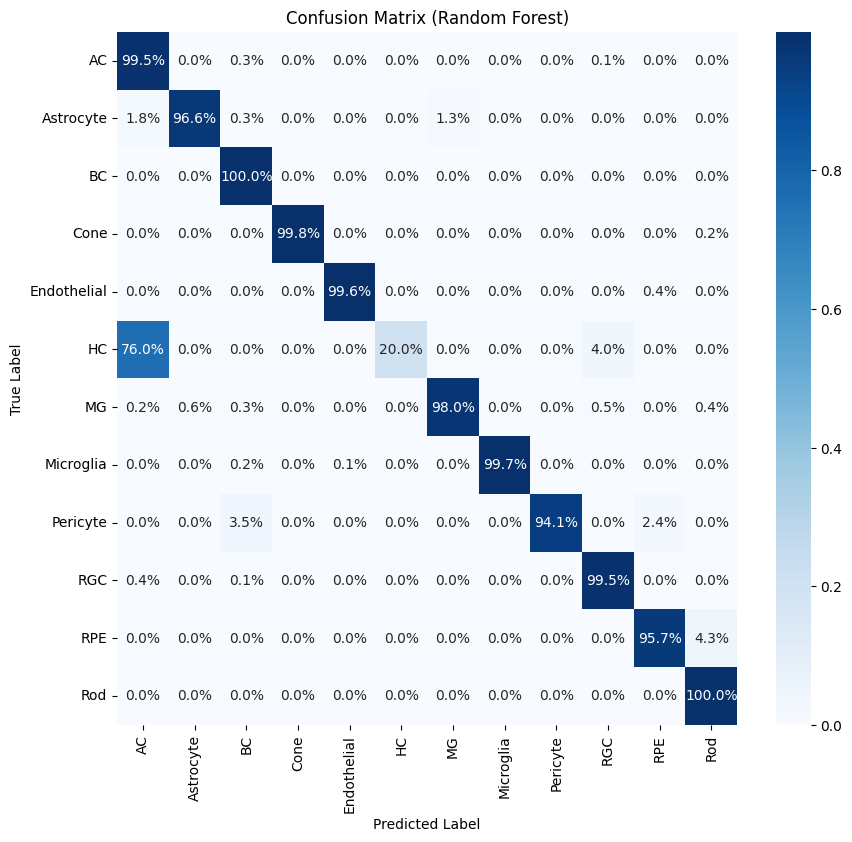

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf, labels=rf_classifier.classes_)

# Make percentage
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
plt.figure(figsize=(10, 9))
sns.heatmap(cm_normalized, annot=True, fmt='.1%', cmap='Blues', 
            xticklabels=le.inverse_transform(rf_classifier.classes_), 
            yticklabels=le.inverse_transform(rf_classifier.classes_))

# Create Labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Random Forest)')

# Save Figure to File
plt.savefig("figures/modeling/random_forest_majorclass_confusion_matrix", bbox_inches='tight')
plt.show()

In [14]:
adata.obs['majorclass'].value_counts()

majorclass
BC             147557
RGC             64853
AC              42824
Rod             34073
MG               7918
Microglia        6098
Cone             4842
Astrocyte        1925
Endothelial      1163
Pericyte          406
RPE               396
HC                131
Name: count, dtype: int64

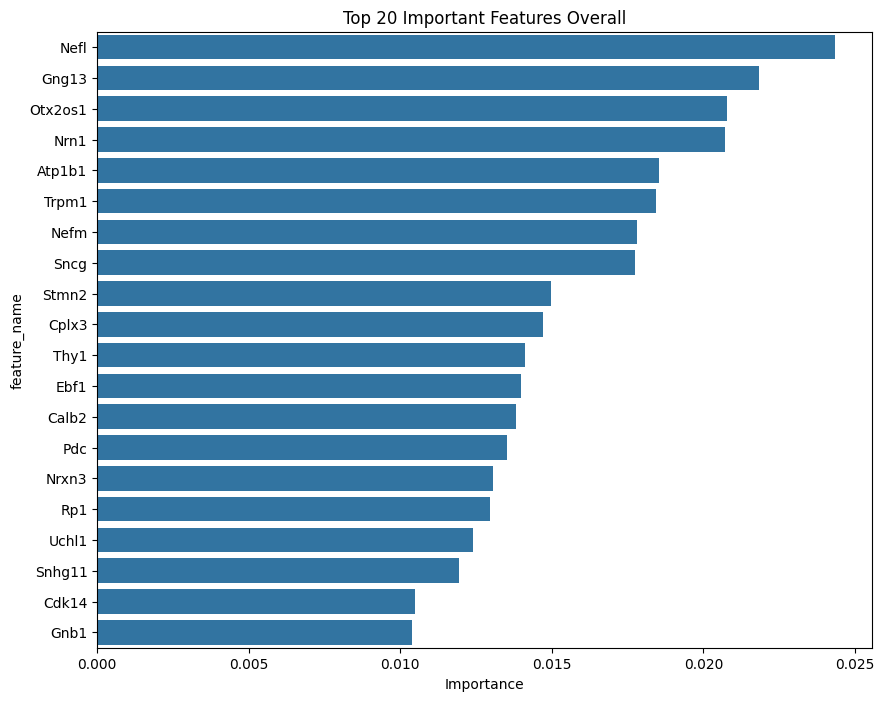

In [15]:
# Get feature importances
feature_importances_rf = rf_classifier.feature_importances_

# Create a DataFrame for better visualization
feature_importance_rf_df = pd.DataFrame({
    'ESUM': adata.var_names,
    'feature_name': adata.var['feature_name'].astype(str),  # Ensure feature_name is string
    'Importance': feature_importances_rf
})

feature_importance_rf_df = feature_importance_rf_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Plot the top 20 important features overall
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='feature_name', data=feature_importance_rf_df.head(20))
plt.title('Top 20 Important Features Overall')

# Save Fig
plt.savefig('figures/modeling/random_forest_top_20_feature_importance')
plt.show()


In [16]:
feature_importance_rf_df

,ESUM,feature_name,Importance
0,ENSMUSG00000022055,Nefl,2.435550e-02
1,ENSMUSG00000025739,Gng13,2.183931e-02
2,ENSMUSG00000098682,Otx2os1,2.078197e-02
3,ENSMUSG00000039114,Nrn1,2.071711e-02
4,ENSMUSG00000026576,Atp1b1,1.853607e-02
...,...,...,...
1877,ENSMUSG00000090080,Gm15872,1.184922e-06
1878,ENSMUSG00000113209,1700081N11Rik,9.499253e-07
1879,ENSMUSG00000075307,Klhl41,4.463420e-07
1880,ENSMUSG00000108456,4732496C06Rik,4.294046e-07


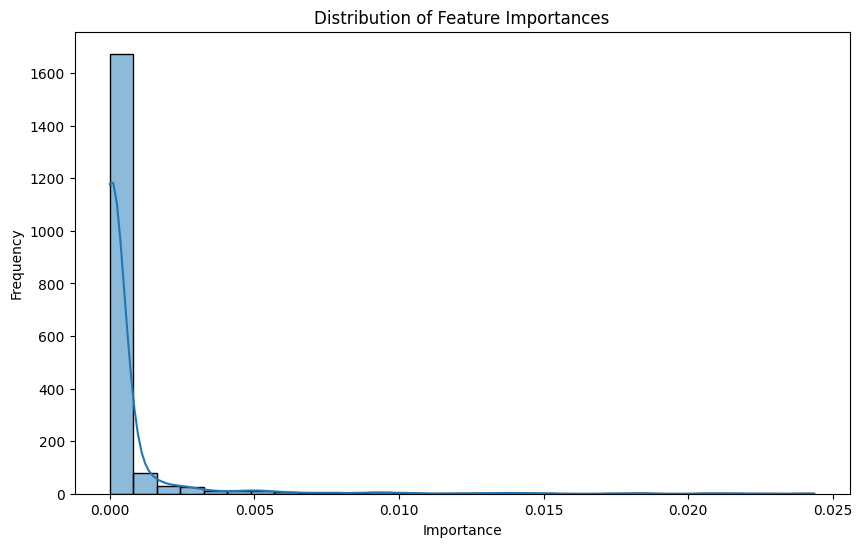

In [17]:
# Plot the distribution of feature importances
plt.figure(figsize=(10, 6))
sns.histplot(feature_importance_rf_df['Importance'], bins=30, kde=True)
plt.title('Distribution of Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Frequency')

#Save figure
plt.savefig('figures/modeling/random_forest_feature_importance_distribution')

plt.show()

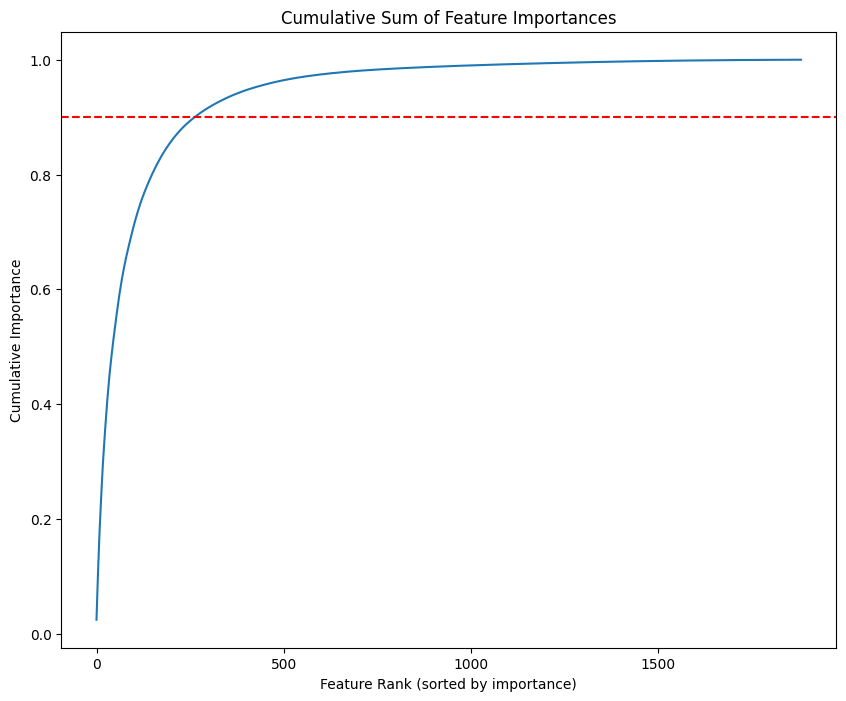

In [18]:
# Calculate the cumulative sum of importances
feature_importance_rf_df['Cumulative Importance'] = feature_importance_rf_df['Importance'].cumsum()

# Plot the cumulative sum
plt.figure(figsize=(10, 8))
sns.lineplot(data=feature_importance_rf_df, x=feature_importance_rf_df.index, y='Cumulative Importance')
plt.axhline(y=0.9, color='r', linestyle='--')  # Line at 90% cumulative importance
plt.xticks(ticks=range(0, len(feature_importance_rf_df), 500))  # Set x-ticks at increments of 100
plt.xlabel('Feature Rank (sorted by importance)')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Sum of Feature Importances')

#save fig
plt.savefig('figures/modeling/random_forest_cumulative_feature_importance_distribution')

plt.show()

In [32]:
# For class-specific analysis, you can inspect trees or use permutation importance
# Using permutation importance from sklearn
from sklearn.inspection import permutation_importance

result = permutation_importance(rf_classifier, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

perm_sorted_idx = result.importances_mean.argsort()

# Plot permutation importance for the top 20 features
plt.figure(figsize=(10, 8))
plt.boxplot(result.importances[perm_sorted_idx].T, vert=False, labels=np.array(adata.var_names)[perm_sorted_idx])
plt.title('Permutation Importance (test set)')
plt.show()

KeyboardInterrupt: 

### One-vs-Rest Logistic Regression
Want to get feature importance per class

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the One-vs-Rest Logistic Regression model
ovr_classifier = LogisticRegression(multi_class='ovr', max_iter=1000, random_state=42)

# Train the classifier
ovr_classifier.fit(X_train, y_train)


## Quality of Life

In [ ]:
import dill

# Save the entire session
filename = 'modeling_notebook_state.pkl'
with open(filename, 'wb') as f:
    dill.dump_session(f)

In [ ]:
import dill

# Load the saved session
filename = 'modeling_notebook_state.pkl'
with open(filename, 'rb') as f:
    dill.load_session(f)

NameError: name 'UnpicklingError' is not defined